<a href="https://colab.research.google.com/github/KKiriri/credit_card_fraud_2515/blob/main/CSC2515_proj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

# Numpy,Pandas
import numpy as np
import pandas as pd
import datetime

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
import missingno as msno
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from itertools import cycle
import warnings
warnings.filterwarnings('ignore')  

pd.set_option('display.float_format', lambda x: '%.4f' % x)

from imblearn.over_sampling import SMOTE
import itertools

In [2]:
from google.colab import files
files.upload()

Saving creditcard.csv to creditcard.csv


In [3]:
data_cr = pd.read_csv('creditcard.csv' , encoding='latin-1')
data_cr.head() 

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0000,-1.3598,-0.0728,2.5363,1.3782,-0.3383,0.4624,0.2396,0.0987,0.3638,0.0908,-0.5516,-0.6178,-0.9914,-0.3112,1.4682,-0.4704,0.2080,0.0258,0.4040,0.2514,-0.0183,0.2778,-0.1105,0.0669,0.1285,-0.1891,0.1336,-0.0211,149.6200,0
1,0.0000,1.1919,0.2662,0.1665,0.4482,0.0600,-0.0824,-0.0788,0.0851,-0.2554,-0.1670,1.6127,1.0652,0.4891,-0.1438,0.6356,0.4639,-0.1148,-0.1834,-0.1458,-0.0691,-0.2258,-0.6387,0.1013,-0.3398,0.1672,0.1259,-0.0090,0.0147,2.6900,0
2,1.0000,-1.3584,-1.3402,1.7732,0.3798,-0.5032,1.8005,0.7915,0.2477,-1.5147,0.2076,0.6245,0.0661,0.7173,-0.1659,2.3459,-2.8901,1.1100,-0.1214,-2.2619,0.5250,0.2480,0.7717,0.9094,-0.6893,-0.3276,-0.1391,-0.0554,-0.0598,378.6600,0
3,1.0000,-0.9663,-0.1852,1.7930,-0.8633,-0.0103,1.2472,0.2376,0.3774,-1.3870,-0.0550,-0.2265,0.1782,0.5078,-0.2879,-0.6314,-1.0596,-0.6841,1.9658,-1.2326,-0.2080,-0.1083,0.0053,-0.1903,-1.1756,0.6474,-0.2219,0.0627,0.0615,123.5000,0
4,2.0000,-1.1582,0.8777,1.5487,0.4030,-0.4072,0.0959,0.5929,-0.2705,0.8177,0.7531,-0.8228,0.5382,1.3459,-1.1197,0.1751,-0.4514,-0.2370,-0.0382,0.8035,0.4085,-0.0094,0.7983,-0.1375,0.1413,-0.2060,0.5023,0.2194,0.2152,69.9900,0


In [4]:
data_cr.shape 

(284807, 31)

In [5]:
data_cr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [6]:
data_cr.describe().T 

,count,mean,std,min,25%,50%,75%,max
Time,284807.0000,94813.8596,47488.1460,0.0000,54201.5000,84692.0000,139320.5000,172792.0000
V1,284807.0000,0.0000,1.9587,-56.4075,-0.9204,0.0181,1.3156,2.4549
V2,284807.0000,0.0000,1.6513,-72.7157,-0.5985,0.0655,0.8037,22.0577
V3,284807.0000,-0.0000,1.5163,-48.3256,-0.8904,0.1798,1.0272,9.3826
V4,284807.0000,0.0000,1.4159,-5.6832,-0.8486,-0.0198,0.7433,16.8753
V5,284807.0000,-0.0000,1.3802,-113.7433,-0.6916,-0.0543,0.6119,34.8017
V6,284807.0000,0.0000,1.3323,-26.1605,-0.7683,-0.2742,0.3986,73.3016
V7,284807.0000,-0.0000,1.2371,-43.5572,-0.5541,0.0401,0.5704,120.5895
V8,284807.0000,-0.0000,1.1944,-73.2167,-0.2086,0.0224,0.3273,20.0072
V9,284807.0000,-0.0000,1.0986,-13.4341,-0.6431,-0.0514,0.5971,15.5950


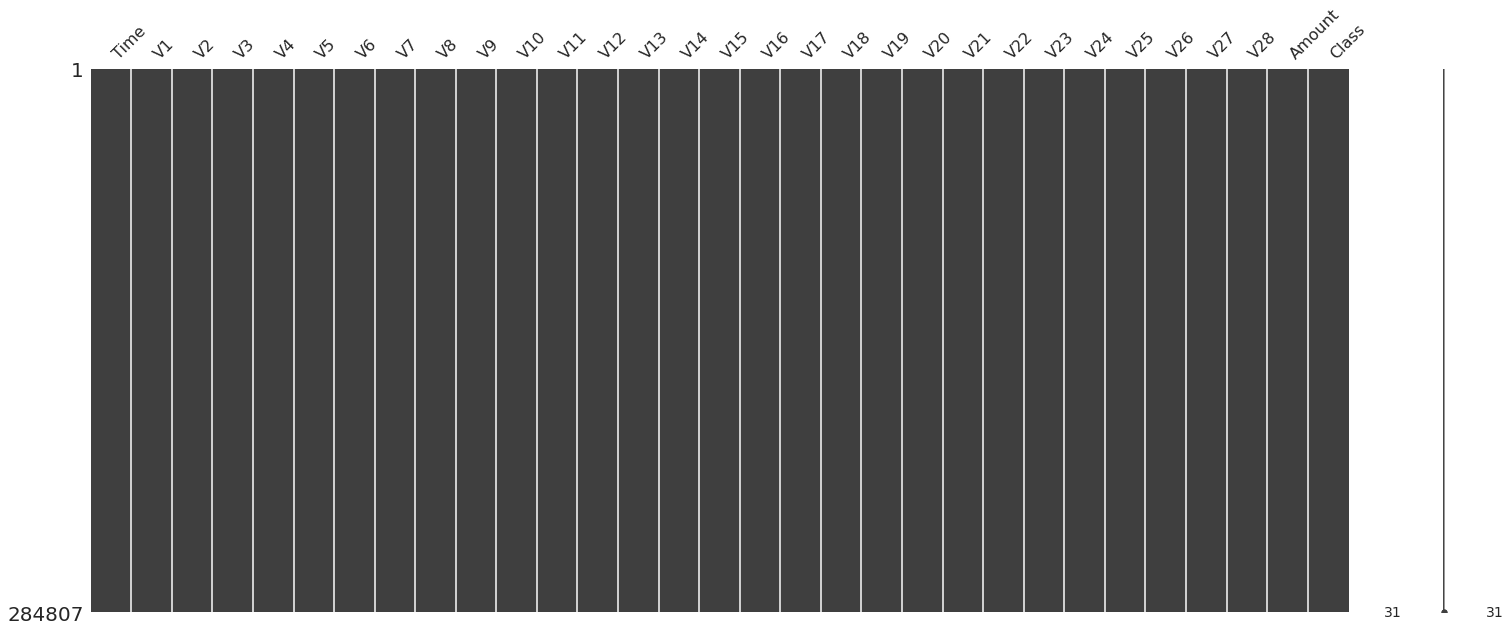

In [7]:
msno.matrix(data_cr)

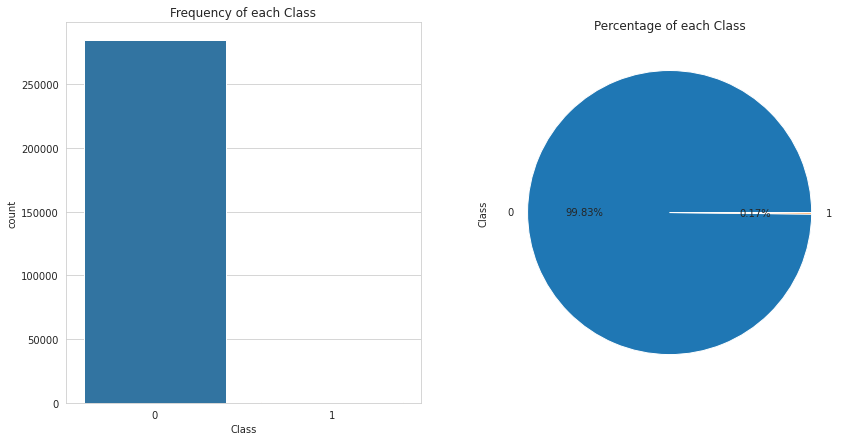

In [8]:
fig, axs = plt.subplots(1,2,figsize=(14,7))
sns.countplot(x='Class',data=data_cr,ax=axs[0])
axs[0].set_title("Frequency of each Class")
data_cr['Class'].value_counts().plot(x=None,y=None, kind='pie', ax=axs[1],autopct='%1.2f%%')
axs[1].set_title("Percentage of each Class")
plt.show()

In [9]:
data_cr.groupby('Class').size()

Class
0    284315
1       492
dtype: int64

In [10]:
data_cr['Hour'] =data_cr["Time"].apply(lambda x : divmod(x, 3600)[0]) 

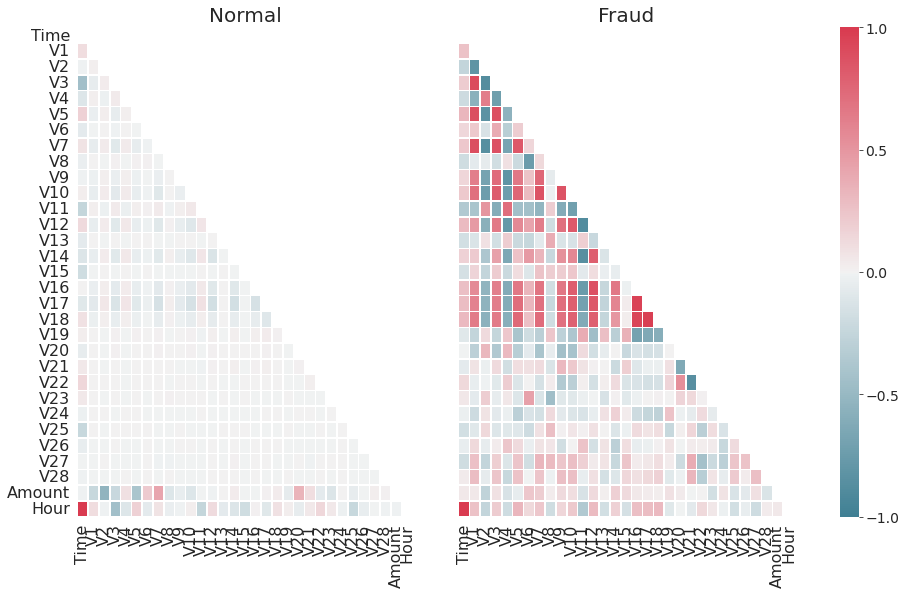

In [11]:
Xfraud = data_cr.loc[data_cr["Class"] == 1] 
XnonFraud = data_cr.loc[data_cr["Class"] == 0]
                  
correlationNonFraud = XnonFraud.loc[:, data_cr.columns != 'Class'].corr()
mask = np.zeros_like(correlationNonFraud)
indices = np.triu_indices_from(correlationNonFraud)
mask[indices] = True

grid_kws = {"width_ratios": (.9, .9, .05), "wspace": 0.2}
f, (ax1, ax2, cbar_ax) = plt.subplots(1, 3, gridspec_kw=grid_kws, \
                                     figsize = (14, 9))

cmap = sns.diverging_palette(220, 8, as_cmap=True)
ax1 =sns.heatmap(correlationNonFraud, ax = ax1, vmin = -1, vmax = 1, \
    cmap = cmap, square = False, linewidths = 0.5, mask = mask, cbar = False)
ax1.set_xticklabels(ax1.get_xticklabels(), size = 16); 
ax1.set_yticklabels(ax1.get_yticklabels(), size = 16); 
ax1.set_title('Normal', size = 20)

correlationFraud = Xfraud.loc[:, data_cr.columns != 'Class'].corr()
ax2 = sns.heatmap(correlationFraud, vmin = -1, vmax = 1, cmap = cmap, \
 ax = ax2, square = False, linewidths = 0.5, mask = mask, yticklabels = False, \
    cbar_ax = cbar_ax, cbar_kws={'orientation': 'vertical', \
                                 'ticks': [-1, -0.5, 0, 0.5, 1]})
ax2.set_xticklabels(ax2.get_xticklabels(), size = 16); 
ax2.set_title('Fraud', size = 20);

cbar_ax.set_yticklabels(cbar_ax.get_yticklabels(), size = 14);

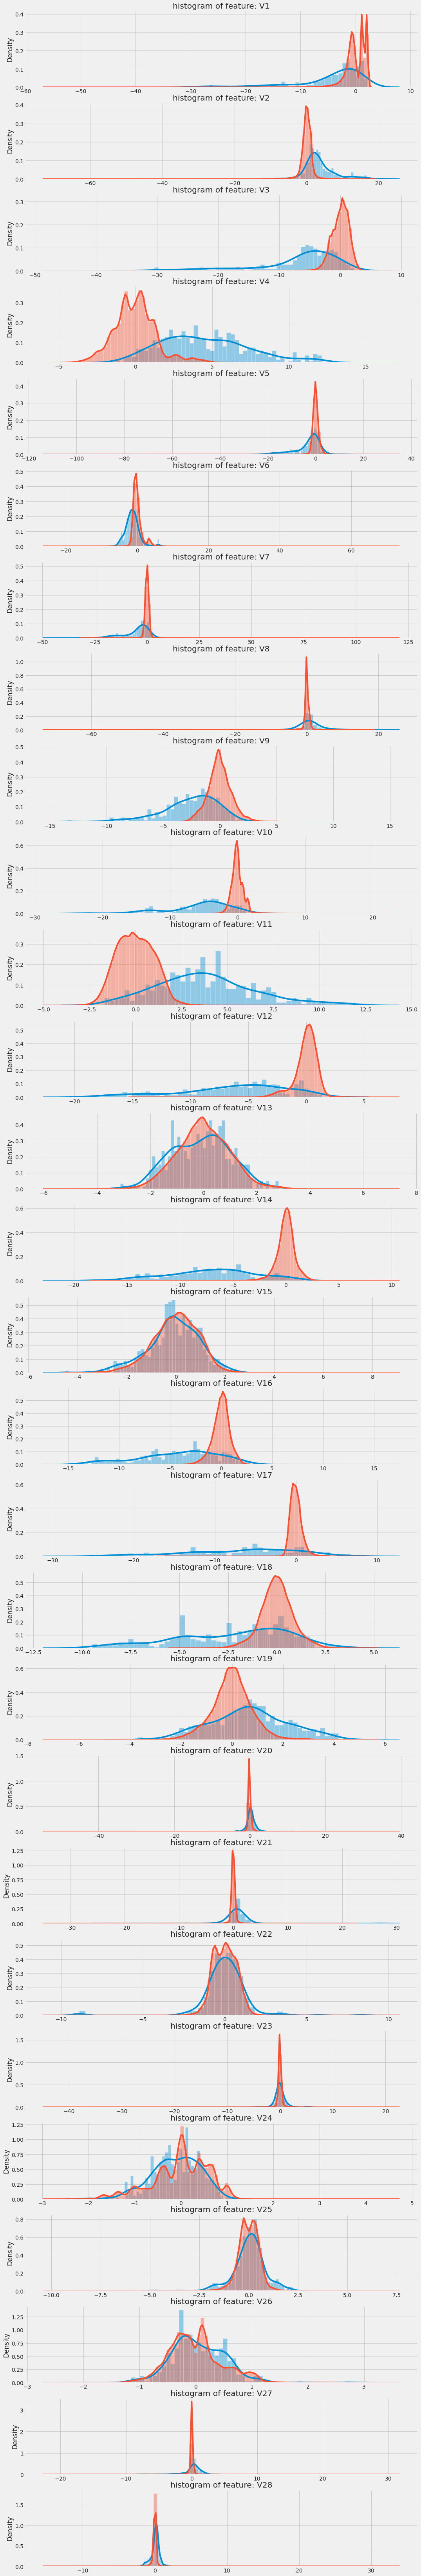

In [32]:
v_feat = data_cr.iloc[:,1:29].columns
plt.figure(figsize=(16,28*4))
gs = gridspec.GridSpec(28, 1)
for i, cn in enumerate(data_cr[v_feat]):
    ax = plt.subplot(gs[i])
    sns.distplot(data_cr[cn][data_cr["Class"] == 1], bins=50)
    sns.distplot(data_cr[cn][data_cr["Class"] == 0], bins=100)
    ax.set_xlabel('')
    ax.set_title('histogram of feature: ' + str(cn))

In [12]:
droplist = ['V8', 'V13', 'V15', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28','Time']
data_new = data_cr.drop(droplist, axis = 1)

In [34]:
col = ['Amount','Hour']
from sklearn.preprocessing import StandardScaler 
sc =StandardScaler() 
data_new[col] =sc.fit_transform(data_new[col])
data_new.head()

,V1,V2,V3,V4,V5,V6,V7,V9,V10,V11,V12,V14,V16,V17,V18,V19,Amount,Class,Hour
0,-1.3598,-0.0728,2.5363,1.3782,-0.3383,0.4624,0.2396,0.3638,0.0908,-0.5516,-0.6178,-0.3112,-0.4704,0.2080,0.0258,0.4040,0.2450,0,-1.9603
1,1.1919,0.2662,0.1665,0.4482,0.0600,-0.0824,-0.0788,-0.2554,-0.1670,1.6127,1.0652,-0.1438,0.4639,-0.1148,-0.1834,-0.1458,-0.3425,0,-1.9603
2,-1.3584,-1.3402,1.7732,0.3798,-0.5032,1.8005,0.7915,-1.5147,0.2076,0.6245,0.0661,-0.1659,-2.8901,1.1100,-0.1214,-2.2619,1.1607,0,-1.9603
3,-0.9663,-0.1852,1.7930,-0.8633,-0.0103,1.2472,0.2376,-1.3870,-0.0550,-0.2265,0.1782,-0.2879,-1.0596,-0.6841,1.9658,-1.2326,0.1405,0,-1.9603
4,-1.1582,0.8777,1.5487,0.4030,-0.4072,0.0959,0.5929,0.8177,0.7531,-0.8228,0.5382,-1.1197,-0.4514,-0.2370,-0.0382,0.8035,-0.0734,0,-1.9603


In [14]:
x_feature = list(data_new.columns)
x_feature.remove('Class')
x_val = data_new[x_feature]
y_val = data_new['Class']
names = data_cr[x_feature].columns
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(n_estimators=10,random_state=123)
clf.fit(x_val, y_val) 
names, clf.feature_importances_
for feature in zip(names, clf.feature_importances_):
    print(feature)

('V1', 0.016428960714381)
('V2', 0.01208895434189035)
('V3', 0.019333047192017876)
('V4', 0.041954380358988706)
('V5', 0.018124180590092024)
('V6', 0.021263258405632892)
('V7', 0.023306471455539244)
('V9', 0.02261630822969816)
('V10', 0.08104934217396947)
('V11', 0.06706027490232477)
('V12', 0.13196226602546982)
('V14', 0.12929955280214375)
('V16', 0.14082738583269538)
('V17', 0.21127316425921303)
('V18', 0.019528994094810775)
('V19', 0.020030149135284992)
('Amount', 0.011748452413655339)
('Hour', 0.012104857072192589)


(-1.0, 18.0)

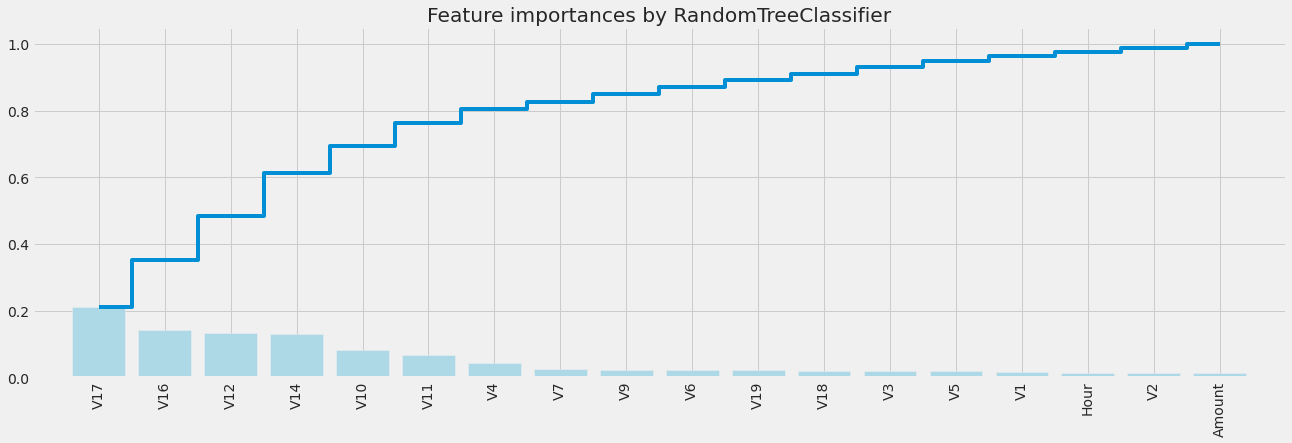

In [15]:
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (12,6)

## feature importances virtualization##
importances = clf.feature_importances_
feat_names = names
indices = np.argsort(importances)[::-1]
fig = plt.figure(figsize=(20,6))
plt.title("Feature importances by RandomTreeClassifier")
plt.bar(range(len(indices)), importances[indices], color='lightblue',  align="center")
plt.step(range(len(indices)), np.cumsum(importances[indices]), where='mid', label='Cumulative')
plt.xticks(range(len(indices)), feat_names[indices], rotation='vertical',fontsize=14)
plt.xlim([-1, len(indices)])

In [16]:

X = data_cr[x_feature]
y = data_cr["Class"]

n_sample = y.shape[0]
n_pos_sample = y[y == 0].shape[0]
n_neg_sample = y[y == 1].shape[0]
print('Total Sample：{}; Positive Sample: {:.2%}; Negative Sample: {:.2%}'.format(n_sample, n_pos_sample / n_sample, n_neg_sample / n_sample))
print('Feature number：', X.shape[1])

Total Sample：284807; Positive Sample: 99.83%; Negative Sample: 0.17%
Feature number： 18


In [17]:
from imblearn.over_sampling import SMOTE # for imbalanced classification

sm = SMOTE(random_state=42)    
X, y = sm.fit_resample(X, y)
print('After balancing the sample through SMOTE')
n_sample = y.shape[0]
n_pos_sample = y[y == 0].shape[0]
n_neg_sample = y[y == 1].shape[0]
print('Total Sample：{}; Positive Sample: {:.2%}; Negative Sample: {:.2%}'.format(n_sample, n_pos_sample / n_sample, n_neg_sample / n_sample))


After balancing the sample through SMOTE
Total Sample：568630; Positive Sample: 50.00%; Negative Sample: 50.00%


In [18]:
from sklearn.linear_model import LogisticRegression
clf1 = LogisticRegression() 
clf1.fit(X, y)

LogisticRegression()

In [19]:
predicted_1 = clf.predict(X) 
print("Test set accuracy score: {:.4f}".format(accuracy_score(predicted_1, y,)))


Test set accuracy score: 0.9044


Recall metric in the testing dataset:  0.808726236744456


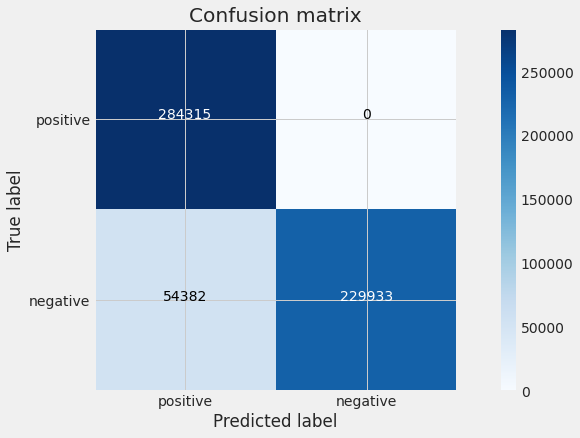

In [20]:
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
con_matrix = confusion_matrix(y, predicted_1)
np.set_printoptions(precision=2)

print("Recall metric in the testing dataset: ", con_matrix[1,1]/(con_matrix[1,0]+con_matrix[1,1]))

# Plot non-normalized confusion matrix
classes = ['positive', 'negative']
plt.figure()
plot_confusion_matrix(con_matrix
                      , classes=classes
                      , title='Confusion matrix')
plt.show()

In [21]:
from sklearn.metrics import classification_report
print(classification_report(y, predicted_1))

              precision    recall  f1-score   support

           0       0.84      1.00      0.91    284315
           1       1.00      0.81      0.89    284315

    accuracy                           0.90    568630
   macro avg       0.92      0.90      0.90    568630
weighted avg       0.92      0.90      0.90    568630



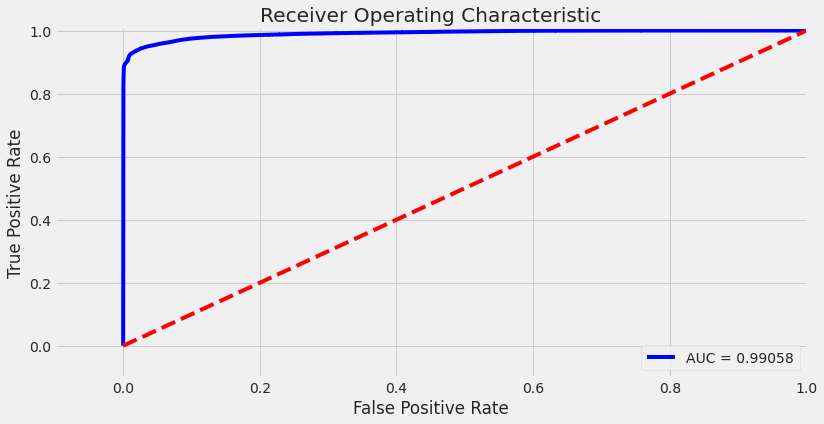

In [22]:
Y_pred1_prob = clf1.predict_proba(X)[:, 1]

fpr, tpr, thresholds = roc_curve(y,Y_pred1_prob)
roc_auc = auc(fpr,tpr)

# ROC
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b',label='AUC = %0.5f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.0])
plt.ylim([-0.1,1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [23]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
grid = {'C': [0.01,0.1, 1, 10, 100, 1000,], 'penalty': [ 'l1', 'l2']}
gs = GridSearchCV(LogisticRegression(),  grid, cv=10)
gs.fit(X_train, Y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l1', 'l2']})

In [24]:
print("Best hyperparameters: {}".format(gs.best_params_))
print("Best CV score: {:.4f}".format(gs.best_score_))

Best hyperparameters: {'C': 100, 'penalty': 'l2'}
Best CV score: 0.9585


In [25]:
Y_pred = gs.predict(X_test)
print("Test set score: {:.4f}".format(accuracy_score(Y_test, Y_pred,)))

Test set score: 0.9584


In [26]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96     85172
           1       0.98      0.93      0.96     85417

    accuracy                           0.96    170589
   macro avg       0.96      0.96      0.96    170589
weighted avg       0.96      0.96      0.96    170589



Recall metric in the testing dataset:  0.933572942154372


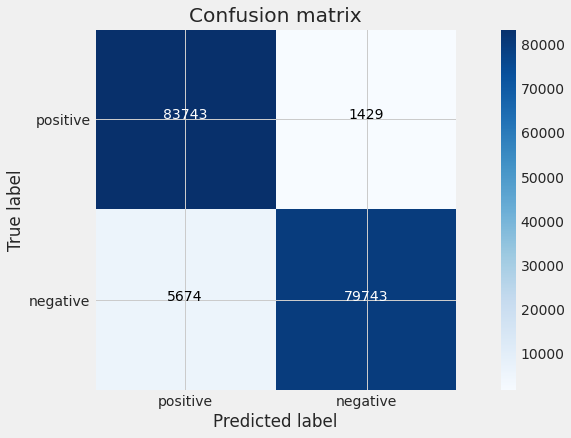

In [27]:
# Compute confusion matrix
con_matrix = confusion_matrix(Y_test, Y_pred)
np.set_printoptions(precision=2)

print("Recall metric in the testing dataset: ", con_matrix[1,1]/(con_matrix[1,0]+con_matrix[1,1]))

# Plot non-normalized confusion matrix
classes = ['positive', 'negative']
#plt.figure()
plot_confusion_matrix(con_matrix, classes=classes, title='Confusion matrix')
plt.show()

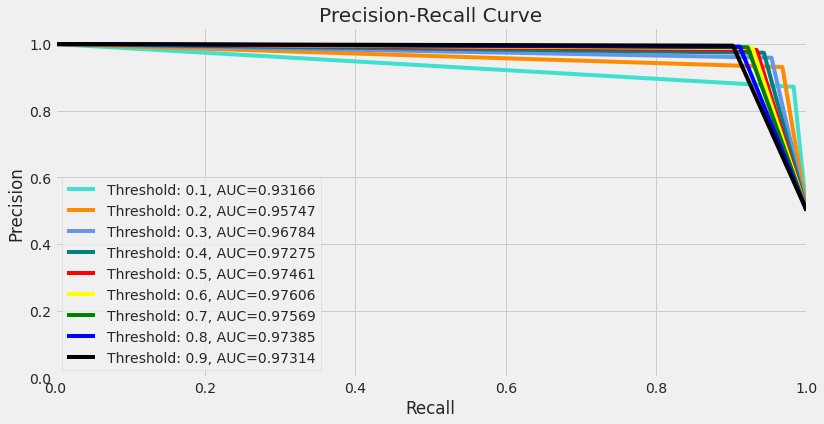

In [28]:
thresholds = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
colors = cycle(['turquoise', 'darkorange', 'cornflowerblue', 'teal', 'red', 'yellow', 'green', 'blue','black'])

Y_pred_proba = gs.predict_proba(X_test)

for i,color in zip(thresholds,colors):
    Y_test_predictions_prob = Y_pred_proba[:,1] > i  
    precision, recall, thresholds = precision_recall_curve(Y_test, Y_test_predictions_prob)
    
    plt.plot(recall, precision, color=color, label='Threshold: %s, AUC=%0.5f' %(i, auc(recall, precision)))
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.legend(loc="lower left")